In [1]:
import sys
sys.path.append('../')
from pyACC.clustering.mock_generator import generate_gaussian_map
from pyACC.clustering.clustering_measure import get_power_spectrum

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

import camb

In [2]:
Omega_b= 0.05
Omega_c = 0.25
h=0.7
As = 2.1e-09
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1e-09
 At = 1.0
 

In [3]:
pars.set_matter_power(redshifts=[10.], kmax=100.)
result = camb.get_results(pars)

In [4]:
kh, z, pk = result.get_matter_power_spectrum(minkh=1.e-4, maxkh=100, npoints=512)

In [5]:
pk.shape

(1, 512)

In [6]:
# define power spectrum interpolator
pk_func = interp1d(kh, pk[0], fill_value='extrapolate', kind='cubic')

In [7]:
# define the box
side = 500      #Mpc/h
spacing = 5     #Mpc/h

In [8]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

In [9]:
delta_k.shape

(100, 100, 51)

In [10]:
delta_x.shape

(100, 100, 100)

(array([1.00000e+00, 7.00000e+00, 1.10000e+01, 5.80000e+01, 1.97000e+02,
        6.06000e+02, 1.65500e+03, 4.08100e+03, 9.23400e+03, 1.81460e+04,
        3.25020e+04, 5.27980e+04, 7.66520e+04, 1.00630e+05, 1.19609e+05,
        1.28916e+05, 1.23494e+05, 1.07577e+05, 8.40020e+04, 5.97720e+04,
        3.81220e+04, 2.18850e+04, 1.13240e+04, 5.28400e+03, 2.20200e+03,
        8.32000e+02, 3.12000e+02, 6.50000e+01, 1.90000e+01, 7.00000e+00]),
 array([-0.96702771, -0.90524333, -0.84345894, -0.78167455, -0.71989016,
        -0.65810577, -0.59632138, -0.534537  , -0.47275261, -0.41096822,
        -0.34918383, -0.28739944, -0.22561505, -0.16383067, -0.10204628,
        -0.04026189,  0.0215225 ,  0.08330689,  0.14509128,  0.20687566,
         0.26866005,  0.33044444,  0.39222883,  0.45401322,  0.5157976 ,
         0.57758199,  0.63936638,  0.70115077,  0.76293516,  0.82471955,
         0.88650393]),
 <BarContainer object of 30 artists>)

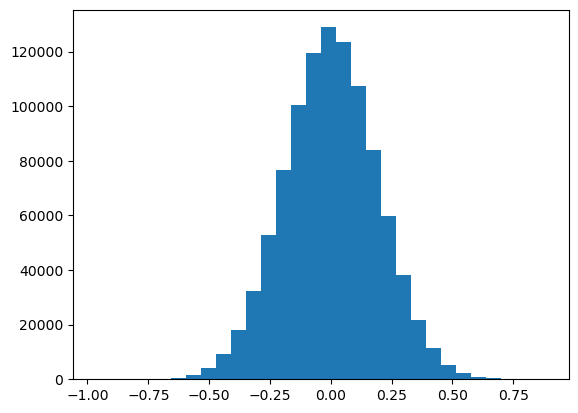

In [11]:
plt.hist(delta_x.flatten(), bins=30)

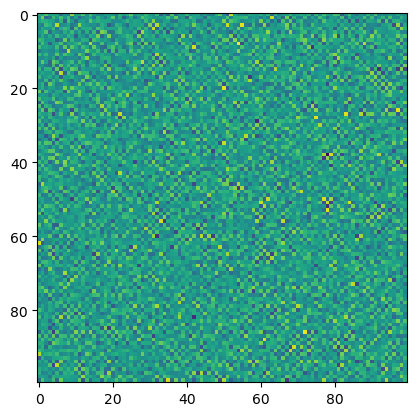

In [12]:
plt.imshow(delta_x[:,:,1])

In [13]:
n_kF = 3

k_bins, pk_meas = get_power_spectrum(delta_x, side, spacing, n_kF=n_kF)

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


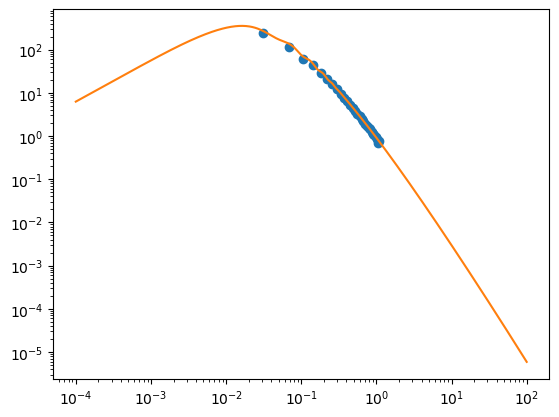

In [14]:
plt.loglog(k_bins, pk_meas, linestyle='', marker='o')
plt.loglog(kh, pk[0])

In [15]:
# generate points

n_mean = 1.e-3
Volume = side**3
N_part = Volume*n_mean

In [16]:
N_part

125000.0

inside each cell of the grid I have no clustering info, because I am below my resolution. 

In [17]:
n_x = n_mean*(1+delta_x)

In [18]:
n_x.shape

(100, 100, 100)

In [19]:
# number of objects in each cell
Nobj_x = n_x * spacing**3
print(Nobj_x)

[[[0.14223658 0.13604358 0.13672878 ... 0.12399819 0.13698692 0.11410608]
  [0.12508735 0.13548894 0.09020123 ... 0.10310497 0.13842009 0.11689778]
  [0.11119385 0.15896444 0.15109426 ... 0.14532137 0.13078441 0.12897345]
  ...
  [0.15676203 0.1345539  0.12552614 ... 0.16574336 0.15462414 0.10773221]
  [0.1254624  0.11859174 0.12106682 ... 0.11678563 0.12207244 0.10790184]
  [0.15733429 0.11336733 0.16731952 ... 0.11552621 0.11648053 0.14916586]]

 [[0.10772859 0.12173312 0.14975529 ... 0.14225705 0.16847175 0.13720915]
  [0.13313831 0.16946095 0.17911595 ... 0.13141523 0.11370499 0.14691963]
  [0.13151231 0.08427702 0.08704735 ... 0.12772375 0.1596921  0.15889186]
  ...
  [0.09834726 0.11218562 0.12861765 ... 0.10794476 0.07540903 0.1186187 ]
  [0.15476841 0.141009   0.09066837 ... 0.14031498 0.15139752 0.12010995]
  [0.08654585 0.12005014 0.09104748 ... 0.12059601 0.13969844 0.12993026]]

 [[0.13217772 0.1289517  0.13130059 ... 0.09916586 0.11590429 0.1469147 ]
  [0.11441778 0.144031

I use Nobj_x as the mean of a multivariate Poisson distribution, defined on each cell. This gives me the number of observed galaxies in each cell of the grid. This accounts for the mistake I make when sampling the true distribution extracting a random sampling of it with my measures.

In [20]:
Npart = np.random.poisson(Nobj_x)
print(Npart.shape)

(100, 100, 100)


In [21]:
np.sum(Npart)

124832

In [22]:
## density contrast of the sampled observed distribution
delta_N_x = Npart/Nobj_x-1

discretizing the field, that is measuring it on the grid, introduces the shot noise. One wants enough clustering signal not to be dominated by the shot noise

(array([8.82917e+05, 0.00000e+00, 0.00000e+00, 2.53000e+03, 3.15600e+04,
        4.21010e+04, 2.13200e+04, 8.08200e+03, 3.62700e+03, 2.47800e+03,
        1.86500e+03, 1.32400e+03, 8.82000e+02, 5.23000e+02, 3.15000e+02,
        1.79000e+02, 1.24000e+02, 5.00000e+01, 4.60000e+01, 2.50000e+01,
        1.80000e+01, 1.30000e+01, 7.00000e+00, 3.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([-1.        ,  0.42312753,  1.84625506,  3.26938259,  4.69251012,
         6.11563765,  7.53876518,  8.96189271, 10.38502024, 11.80814777,
        13.2312753 , 14.65440283, 16.07753036, 17.50065789, 18.92378542,
        20.34691295, 21.77004048, 23.19316801, 24.61629554, 26.03942307,
        27.4625506 , 28.88567813, 30.30880566, 31.73193319, 33.15506072,
        34.57818825, 36.00131578, 37.42444331, 38.84757084, 40.27069837,
        41.6938259 ]),
 <BarContainer object of 30 artists>)

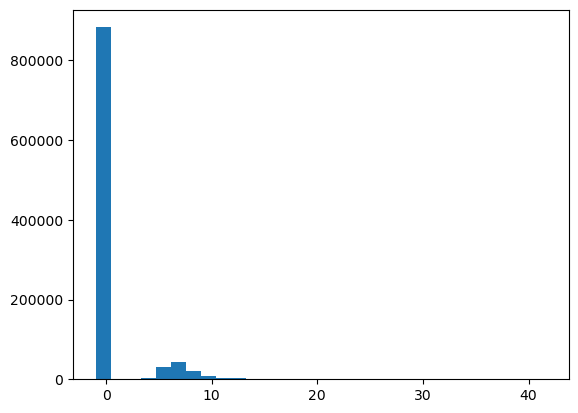

In [23]:
plt.hist(delta_N_x.flatten(), bins=30)

# 2PCF

In [24]:
from pyACC.clustering.clustering_measure import count_pairs

In [25]:
data = np.random.uniform(0,side, (10000,3))

In [26]:
from scipy.spatial import cKDTree

In [27]:
## save the catalogue in a cKDTree data structure
tree = cKDTree(data)

Let's see the function tree.query_ball_point in action

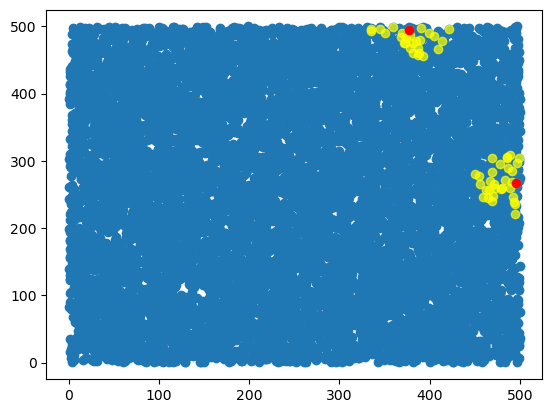

In [28]:
plt.plot(data[:,0], data[:,1], 'o')
neighbours = tree.query_ball_point(data[77,:], 50)                  ## returns a list of indeces
plt.plot(data[neighbours, 0], data[neighbours,1], color='yellow', marker='o', alpha=0.7,linestyle='')
plt.plot(data[77,0], data[77,1], color='red', marker='o')

neighbours = tree.query_ball_point(data[67,:], 50)                  ## returns a list of indeces
plt.plot(data[neighbours, 0], data[neighbours,1], color='yellow', marker='o', alpha=0.7, linestyle='')
plt.plot(data[67,0], data[67,1], color='red', marker='o')

Note the difference between points far away from the sides of the box and points close to the side of the box: with no periodic boundary conditions, the closer to the sides, the smaller the number of neighbours.